In [1]:
#Import dependencies
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import csv
from config import gkey
import os
import datetime
None

In [2]:
current_date = datetime.date.today()


In [3]:
#Read in the CSV File
csv = os.path.join("worldcities.csv")
cities = pd.read_csv(csv)
sample_data = cities.sample(n = 500)

In [ ]:
base_url = "https://api.openweathermap.org/data/2.5/weather"
params ={
    "appid": gkey,
    "units": "imperial",
}

for index, row in sample_data.iterrows():
    lat = row["Latitude"]
    params["lat"] = lat
    
    lon = row["Longitude"]
    params["lon"] = lon
    
    url = requests.get(base_url, params=params)
    response = url.json()
    
    temp = response["main"]["temp_max"]
    hum = response["main"]["humidity"]
    cloud = response["clouds"]["all"]
    wind = response["wind"]["speed"]
    
    try:
        sample_data.loc[index,"Temperature"] = temp
        sample_data.loc[index,"Humidity"] = hum
        sample_data.loc[index,"Cloudiness"] = cloud
        sample_data.loc[index,"Wind Speed"] = wind
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")     
    
    city = sample_data.loc[index,"City"]
    print(f"Retrieving Results for Index {index}: {city}, {url.url}.")

In [5]:
sample_data = sample_data.rename(index=str, columns={"Temperature":"Max Temp"})
sample_data.head()

,Country,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
43002,us,springfield,30.153056,-85.611389,78.80,88.0,40.0,8.05
44180,us,minneapolis,44.980000,-93.263611,73.40,88.0,75.0,4.70
23867,mx,huaxpaltepec,16.316667,-97.933333,79.40,84.0,36.0,3.56
4466,ca,blenheim,42.333333,-82.000000,75.44,75.0,80.0,17.20
23724,mx,cutzamala,18.466667,-100.566667,87.32,42.0,8.0,4.56


Text(0,0.5,'Max Temp(F)')

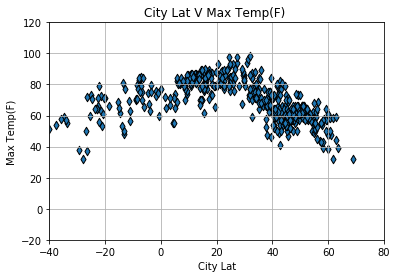

In [6]:
lat = sample_data["Latitude"]
temp = sample_data['Max Temp']

plt.scatter(lat,temp, marker="d", edgecolors="black")
plt.grid()
plt.xlim(-40,80)
plt.ylim(-20,120)
plt.title("City Lat V Max Temp(F) ")
plt.xlabel("City Lat")
plt.ylabel("Max Temp(F)")

Text(0,0.5,'Humidity')

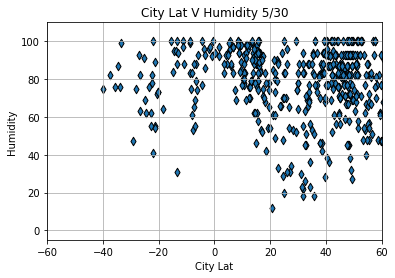

In [7]:
lat = sample_data["Latitude"]
hum = sample_data['Humidity']

plt.scatter(lat,hum, marker="d", edgecolors="black")
plt.grid()
plt.xlim(-60,60)
plt.ylim(-5,110)
plt.title(f"City Lat V Humidity {current_date.month}/{current_date.day}")
plt.xlabel("City Lat")
plt.ylabel("Humidity")

Text(0,0.5,'Cloudiness (%)')

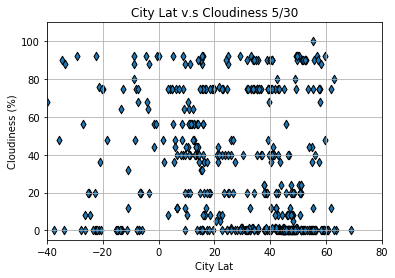

In [8]:
lat = sample_data["Latitude"]
cloud = sample_data['Cloudiness']

plt.scatter(lat,cloud, marker="d", edgecolors="black")
plt.grid()
plt.xlim(-40,80)
plt.ylim(-5,110)
plt.title(f"City Lat v.s Cloudiness {current_date.month}/{current_date.day}")
plt.xlabel("City Lat")
plt.ylabel("Cloudiness (%)")

Text(0,0.5,'Wind Speed (mph)')

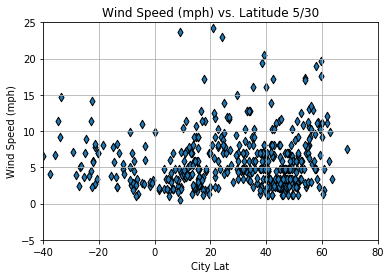

In [9]:
lat = sample_data["Latitude"]
wind = sample_data['Wind Speed']

plt.scatter(lat,wind, marker="d", edgecolors="black")
plt.grid()
plt.xlim(-40,80)
plt.ylim(-5,25)
plt.title(f"Wind Speed (mph) vs. Latitude {current_date.month}/{current_date.day}")
plt.xlabel("City Lat")
plt.ylabel("Wind Speed (mph)")

Three observable trends
- Overall, Windspeed incresasses as the city latitute increases. I would have expected more of a bell curve, but cities at the equator have very low windspeed. 
- There is a rough bell curve for max temp v.s. city latitutde. Although, the cities with the highest max temp were slightly north of the equator. The given data set may have less cities on the equator (zero lat), which could be affecting the skew of the curve
- While high Humidity is seen across cities at all latitiudes. There are very few cities at lats between 0 to 10 that have a humidity percentage of less than 100